# **Presentacion de Proyecto**

## **1.- Hipótesis.**
El Objetivo es identificar la suba de precio del producto de mayor consumo.

## **2. - Objetivo y alcance.**

El Proposito es desarrollar un modelo de clasificacion donde se pueda predecir la suba de precio tomando distintas variables de consumo, cantidad de venta, cantidad de stock para evitar el sobre precio en las distintas cadenas

# **Data Acquisition**

**1.- Descripción de los datos.**

Productos con su precio y descripción en los principales supermercados de España.

Las características de este dataset son las siguientes:

Volumen estimado: 25000 registros cada 24 h Histórico: disponible desde 2020-07

Fuentes https://www.kaggle.com/datasets/datamarket/productos-de-supermercados


**2.- Diccionario de datos.**

ATRIBUTOS ------------------------------ DESCRIPCION

supermarket: --------------- Supermercado al que pertenece el producto.|

name:-------------------------- Nombre del producto.|

category:---------------------- Categoría del producto.|

description:------------------- Información adicional del producto (formato de empaquetado, etc.).

insert_date:------------------ Fecha de extracción de la información.|

price:------------------------------ Precio absoluto del producto en €.|

reference_price:--------------- Precio unitario (por unidad de medida del producto, €/Kg, €/L,|

reference_unit:--------------- Unidad de referencia del producto (Kg, L, etc.).|

trademark: --------------- -- Marca comercial del producto.|

trademark_propietary_flag: Define si el producto es de marca blanca.|

offer_flag:--------------- Indica si el producto tiene algún tipo de oferta o promoción

offer_price:--------------- Precio de oferta (en el caso de existir).|

offer_type:--------------- Tipo de promoción aplicada.|

url:-------------------------- Link del producto en el supermercado online.|

zip_code:--------------- Código postal que cubre el supermercado.|

## **Importacion de Dataset**

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el archivo compartido en memoria
url = "https://drive.google.com/uc?id="
ext = "1ED11_hak8OiNdX7ov8-2XdNIk4-2SBBv"
df = pd.read_excel(url+ext)

In [3]:
#Llamo la cabecera del archivo para validar el mismo
df.head()

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
0,mercadona-es,postres_y_yogures_yogures_liquidos,Bebida láctea sin lactosa de fresa Hacendado,Pack-4,14.0,219.0,kg,2020-12-23 00:00:00
1,mercadona-es,bodega_licores,Ginebra 15 botanicals Blumara,Botella,1075.0,1536.0,L,2020-11-06 12:00:00
2,mercadona-es,charcuteria_y_quesos_queso_untable_y_fresco,Queso fresco batido desnatado Hacendado 0% mat...,Tarrina,109.0,218.0,kg,2020-09-23 16:06:00
3,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,Yogur bífidus desnatado con lima y limón Danon...,Pack 4x120 G.,208.0,433.0,kg,2020-10-10 00:00:00
4,carrefour-es,la_despensa_helados_bombon,Helado After Dinner Magnum sin gluten 10 ud.,10 Ud.,46.0,46.0,ud,2020-10-15 00:00:00


## **Validacion de Estructura de dataset**

In [4]:
#Generar un Shape para validar las dimensiones del Dataset
df.shape

(65535, 8)

In [5]:
#llamo los ultimos registros del archivo para validar el mismo
df.tail()

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
65530,carrefour-es,la_despensa_conservas_sopas_y_precocinados_con...,Anchoas del Cantábrico en aceite de oliva virg...,60 G.,90.0,1500.0,kg,2020-11-03 12:00:00
65531,carrefour-es,la_despensa_cestas_y_lotes_perfumeria_para_reg...,Estuche Brummel Man: Colonia 125 ml y After Sh...,1 Ud.,80.0,80.0,ud,2020-11-10 12:00:00
65532,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,"Yogur desnatado con trozos de frutas de fresa,...",Pack 12x125 G.,23.0,153.0,kg,2020-12-10 00:00:00
65533,carrefour-es,el_mercado_quesos_tierno,queso tierno El Cigarral 960 g,NaN,1305.0,1359.0,kg,2021-01-16 00:00:00
65534,carrefour-es,bebe_puericultura_accesorios,Limpiador de biberones y tetinas ecológico Fro...,500 Ml.,269.0,538.0,100 ml,2020-10-06 12:00:00


In [6]:
#Validamos el listado de las columnas
df.columns

Index(['SUPERMERCADOS', 'CATEGORIA', 'DESCRIPCION', 'TIPO_ENVASE', 'PRECIO',
       'PRECIO_TOTAL', 'UNIDADES', 'FECHA_INGRESO'],
      dtype='object')

In [7]:
#Validamos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SUPERMERCADOS  65535 non-null  object        
 1   CATEGORIA      65535 non-null  object        
 2   DESCRIPCION    65535 non-null  object        
 3   TIPO_ENVASE    33314 non-null  object        
 4   PRECIO         65533 non-null  float64       
 5   PRECIO_TOTAL   64936 non-null  float64       
 6   UNIDADES       64936 non-null  object        
 7   FECHA_INGRESO  65533 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.0+ MB


In [8]:
#Haces una descripcion de variable numericas
df.describe()

,PRECIO,PRECIO_TOTAL,FECHA_INGRESO
count,65533.000000,6.493600e+04,65533
mean,351.190820,9.738388e+02,2020-11-21 21:52:14.075045888
min,1.000000,0.000000e+00,2020-07-16 04:00:00
25%,57.000000,7.900000e+01,2020-10-22 00:00:00
50%,154.000000,2.460000e+02,2020-11-27 00:00:00
75%,313.000000,7.440000e+02,2021-01-03 12:00:00
max,247005.000000,1.640299e+06,2021-02-09 12:00:00
std,3573.772969,1.634685e+04,NaN


# **Analisis Exploratorio - EDA**
**Exploratory Data Analysis (EDA)**
El Dataset Original consta de 50000 registros y 30 campos (columnas)


En el primer analisis se observaron muchos datos nulos que se tuvieron que derivar a otra
Dataset y solo dejar las variables mas representativas para algunos graficos.

Tambien se generaron estas tipos

* Porcentajes de supermercados
* Cantidad de unidades
* Agrupamiento de Supermercado + Sumatoria de Precio
* Agrupamiento de Supermercado por precio promedio

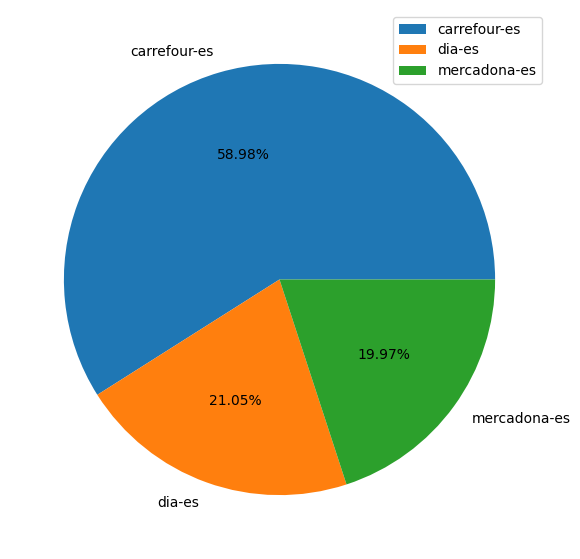

In [21]:
#Porcentajes de supermercados
df_super = df["SUPERMERCADOS"].value_counts()
fig,ax=plt.subplots(figsize=(7,7))
super =['carrefour-es','dia-es','mercadona-es']
ax.pie(df_super, labels = super , autopct="%.2f%%" )
ax.legend()
plt.show()

<Axes: xlabel='UNIDADES'>

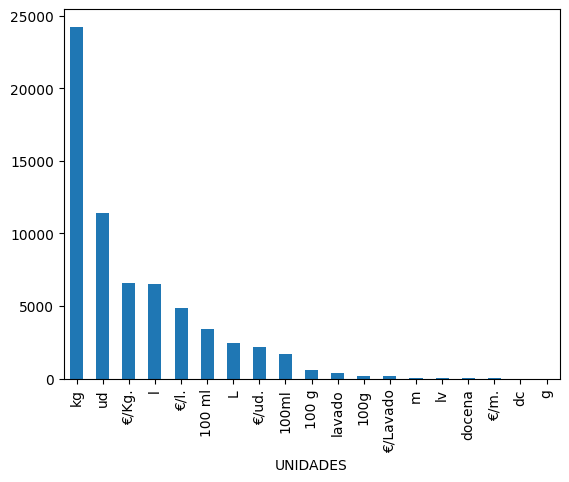

In [22]:
#cantidad de unidades
cantidad_unidades = df.UNIDADES.value_counts()
cantidad_unidades.plot.bar()

<Axes: xlabel='SUPERMERCADO', ylabel='PRECIO SUMA'>

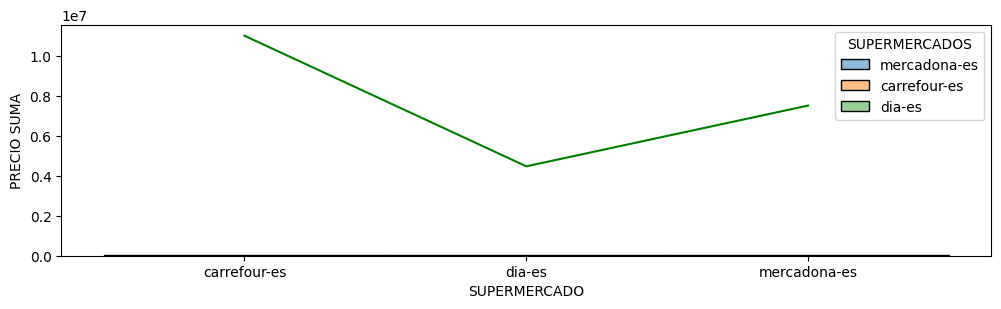

In [18]:
#AGRUPAMIENTO DE SUPERMERCADO + SUMATORIA DE PRECIO
super_unidad_sum = df.groupby("SUPERMERCADOS")["PRECIO"].sum()
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(super_unidad_sum, label= "suma de precio por supermercado", c="green")
ax.legend()
ax.set_xlabel("SUPERMERCADO")
ax.set_ylabel("PRECIO SUMA")

df_super = df["SUPERMERCADOS"].value_counts()
df_super

sns.histplot(data=df, x='SUPERMERCADOS', hue='SUPERMERCADOS')

Text(0, 0.5, 'PRECIO PROMEDIO')

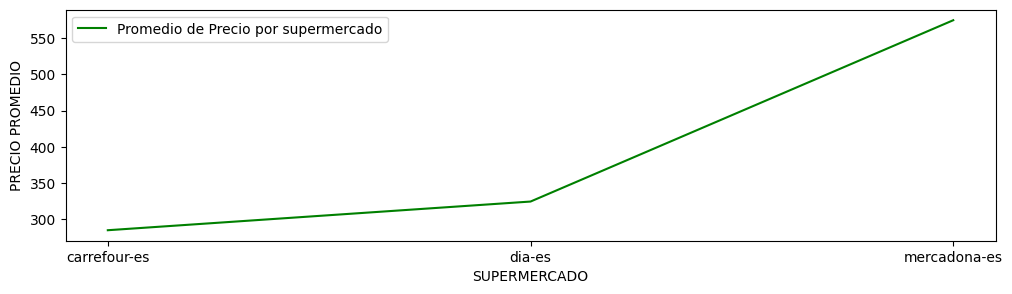

In [17]:
#AGRUPAMIENTO DE SUPERMERCADOS POR PRECIO PROMEDIO
super_unidad = df.groupby("SUPERMERCADOS")["PRECIO"].mean()
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(super_unidad, label= "Promedio de Precio por supermercado", c="green")
ax.legend()
ax.set_xlabel("SUPERMERCADO")
ax.set_ylabel("PRECIO PROMEDIO")


<Axes: xlabel='SUPERMERCADOS', ylabel='Count'>

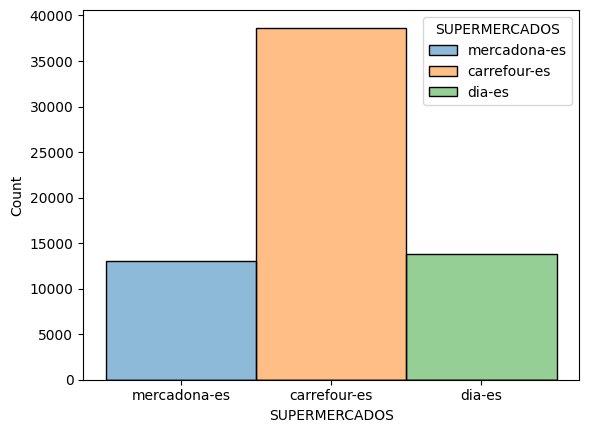

In [23]:
sns.histplot(data=df, x='SUPERMERCADOS', hue='SUPERMERCADOS')

# **Mejora de Dataset y Exploracion de datos**

**Puntos a Mejorar**

* Enriquecer el dataset No estoy cumpliendo con la cantidad de datos a presentar

* Enriquecer las columnas del dataset No estoy cumpliendo con la consigna de tener mas datos numericos.

* Capturar distintos dataset y enriquecer el modelo con un mega dataset

**Proximos Procesos**

* Validar la presencia de valores perdidos y sugerir alguna solución.

* Iniciar el proceso de limpieza y exploración de datos.